#Rough Set

In [ ]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("liver.csv",sep=',')
df

,Gender,Age,TP,DB,AGR,SGPT,SGOT,AAP,Albumin,TB,Liver_Disease
0,1,65,6.8,0.1,0.90,16,18,187,3.3,0.7,2
1,2,62,7.5,5.5,0.74,64,100,699,3.2,10.9,2
2,2,62,7.0,4.1,0.89,60,68,490,3.3,7.3,2
3,2,58,6.8,0.4,1.00,14,20,182,3.4,1.0,2
4,2,72,7.3,2.0,0.40,27,59,195,2.4,3.9,2
...,...,...,...,...,...,...,...,...,...,...,...
475,2,60,5.9,0.1,0.37,20,34,500,1.6,0.5,1
476,2,40,6.0,0.1,1.10,35,31,98,3.2,0.6,2
477,2,52,6.4,0.2,1.00,48,49,245,3.2,0.8,2
478,2,31,6.8,0.5,1.00,29,32,184,3.4,1.3,2


In [ ]:
df=df.iloc[::,1:]         
#df1=df.iloc[::,:-1] #memisahkan antara variabel x dan y
df

,Age,TP,DB,AGR,SGPT,SGOT,AAP,Albumin,TB,Liver_Disease
0,65,6.8,0.1,0.90,16,18,187,3.3,0.7,2
1,62,7.5,5.5,0.74,64,100,699,3.2,10.9,2
2,62,7.0,4.1,0.89,60,68,490,3.3,7.3,2
3,58,6.8,0.4,1.00,14,20,182,3.4,1.0,2
4,72,7.3,2.0,0.40,27,59,195,2.4,3.9,2
...,...,...,...,...,...,...,...,...,...,...
475,60,5.9,0.1,0.37,20,34,500,1.6,0.5,1
476,40,6.0,0.1,1.10,35,31,98,3.2,0.6,2
477,52,6.4,0.2,1.00,48,49,245,3.2,0.8,2
478,31,6.8,0.5,1.00,29,32,184,3.4,1.3,2


In [ ]:
#melakukan encoding (mengganti kategori menjadi angka)
#df['quality'].value_counts()

In [ ]:
#Encoding dengan data sedikit
#cleanup_nums = {"quality":     {"good": 2, "bad": 1}}
#df = df.replace(cleanup_nums)
#df

#Core and Reduct

In [ ]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [ ]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['target']=faktor.iloc[::,-1]
    return df_CR

In [ ]:
df_CR=Core_and_Reduct(df)
df_CR

,Age,TP,DB,AGR,target
0,65,6.8,0.1,0.90,2
1,62,7.5,5.5,0.74,2
2,62,7.0,4.1,0.89,2
3,58,6.8,0.4,1.00,2
4,72,7.3,2.0,0.40,2
...,...,...,...,...,...
475,60,5.9,0.1,0.37,1
476,40,6.0,0.1,1.10,2
477,52,6.4,0.2,1.00,2
478,31,6.8,0.5,1.00,2


In [ ]:
df_CR.to_csv('hasilroughset.csv') 

#Fuzzy

In [ ]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import sys
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df_tsk=pd.read_csv('hasilroughset.csv',sep=',')
df_tsk

,Unnamed: 0,Age,TP,DB,AGR,target
0,0,65,6.8,0.1,0.90,2
1,1,62,7.5,5.5,0.74,2
2,2,62,7.0,4.1,0.89,2
3,3,58,6.8,0.4,1.00,2
4,4,72,7.3,2.0,0.40,2
...,...,...,...,...,...,...
475,475,60,5.9,0.1,0.37,1
476,476,40,6.0,0.1,1.10,2
477,477,52,6.4,0.2,1.00,2
478,478,31,6.8,0.5,1.00,2


In [ ]:
df_tsk=df_tsk.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_tsk

,Age,TP,DB,AGR,target
0,65,6.8,0.1,0.90,2
1,62,7.5,5.5,0.74,2
2,62,7.0,4.1,0.89,2
3,58,6.8,0.4,1.00,2
4,72,7.3,2.0,0.40,2
...,...,...,...,...,...
475,60,5.9,0.1,0.37,1
476,40,6.0,0.1,1.10,2
477,52,6.4,0.2,1.00,2
478,31,6.8,0.5,1.00,2


In [ ]:
df_tsk.describe()

,Age,TP,DB,AGR,target
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,44.904167,6.474375,1.473125,0.953583,1.720833
std,16.025918,1.089286,2.790673,0.327034,0.449058
min,11.000000,2.700000,0.100000,0.300000,1.000000
25%,33.000000,5.775000,0.200000,0.700000,1.000000
50%,45.000000,6.500000,0.300000,0.965000,2.000000
75%,57.250000,7.200000,1.300000,1.100000,2.000000
max,90.000000,9.600000,19.700000,2.800000,2.000000


In [ ]:
df_tsk.isnull().sum()    #untuk mengecek nilai yang hilang

Age       0
TP        0
DB        0
AGR       0
target    0
dtype: int64

In [ ]:
df_tsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     480 non-null    int64  
 1   TP      480 non-null    float64
 2   DB      480 non-null    float64
 3   AGR     480 non-null    float64
 4   target  480 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 18.9 KB


#Info Atribute
1. Age (Umur)
2. Sex (Kelamin)
3. Chest Pain type (Jenis Nyeri Dada) (Cp)
4. Resting Blood Preasure (Tekanan darah Istirahat) (Tresbps)
5. Serum Cholesterol (Kolesterol Serum) (Chol)
6. Fasting Blood Sugar (Gula Darah Puasa) (Fbs)
7. Resting Electrocar Dingraphic Results (Hasil Electrokardiografi istirahat) (Resterg)
8. Maximum Heart Rate Achieved (detak jantung maximum tercapai) (Thalac)
9. Exercise Induced Angina (Angina yang diinduksi oleh olahraga) (Exang)
10. Oldpeak
11. Number of Major (Ca)
12. Slope (Kemiringan)
13. Thal
14. Target



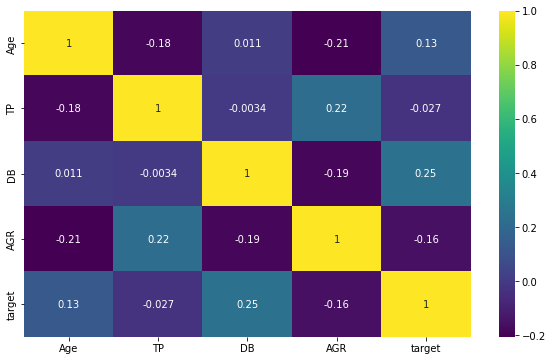

In [ ]:
#untuk melihat korelasi data
k=len(df_tsk.columns)
cm=df_tsk.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# Fuzzyfikasi

##Fuzzy A

In [ ]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [ ]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[int(x_i)]

    return hasil

##Pembentukan Himpunan Fuzzy



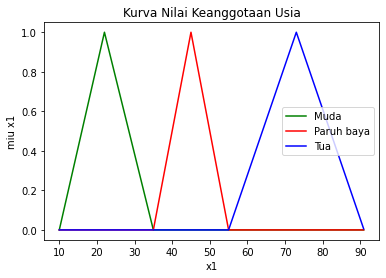

In [ ]:
# Pembentukan Himpunan Fuzzy Age [fungsi buat sendiri]
x_Age = np.arange(10, 91, 0.1) # Semesta Pembicaraan
amb_muda = [10, 22, 35]
amb_paruhbaya = [35, 45, 55]
amb_tua = [55, 73, 91]

miu_Age_muda = fungsi_segitiga(x_Age, amb_muda)
miu_Age_paruhbaya = fungsi_segitiga(x_Age, amb_paruhbaya)
miu_Age_tua = fungsi_segitiga(x_Age, amb_tua)

import matplotlib.pyplot as plt
plt.plot(x_Age, miu_Age_muda, label = "Muda", color='green')
plt.plot(x_Age, miu_Age_paruhbaya, label = "Paruh baya", color='red')
plt.plot(x_Age, miu_Age_tua, label = "Tua", color='blue')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan Usia')
plt.legend()
plt.show()

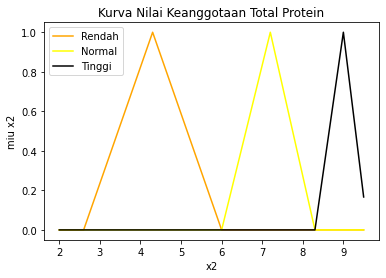

In [ ]:
# Pembentukan Himpunan Fuzzy Total Protein [fungsi buat sendiri]
x_TP = np.arange(2, 9.6, 0.1) # Semesta Pembicaraan
amb_rendah  = [2.6, 4.3, 6]
amb_normal  = [6, 7.2, 8.3]
amb_tinggi = [8.3, 9, 9.6]

miu_TP_rendah  = fungsi_segitiga(x_TP, amb_rendah)
miu_TP_normal  = fungsi_segitiga(x_TP, amb_normal)
miu_TP_tinggi  = fungsi_segitiga(x_TP, amb_tinggi)

import matplotlib.pyplot as plt
plt.plot(x_TP, miu_TP_rendah, label = "Rendah", color='orange')
plt.plot(x_TP, miu_TP_normal, label = "Normal", color='yellow')
plt.plot(x_TP, miu_TP_tinggi, label = "Tinggi", color='black')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan Total Protein')
plt.legend()
plt.show()

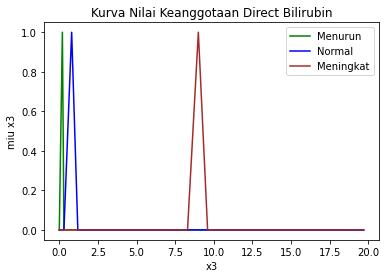

In [ ]:
# Pembentukan Himpunan Fuzzy Direct Bilirubin [fungsi buat sendiri]
x_DB = np.arange(0, 19.8, 0.1) # Semesta Pembicaraan
amb_menurun = [0, 0.2, 0.3]
amb_normal = [0.3, 0.8, 1.2]
amb_meningkat = [1.2, 10.5, 19.8]

miu_DB_menurun  = fungsi_segitiga(x_DB, amb_menurun)
miu_DB_normal  = fungsi_segitiga(x_DB, amb_normal)
miu_DB_meningkat  = fungsi_segitiga(x_DB, amb_tinggi)

import matplotlib.pyplot as plt
plt.plot(x_DB, miu_DB_menurun, label = "Menurun", color='green')
plt.plot(x_DB, miu_DB_normal, label = "Normal", color='blue')
plt.plot(x_DB, miu_DB_meningkat, label = "Meningkat", color='brown')
plt.xlabel('x3')
plt.ylabel('miu x3')
plt.title('Kurva Nilai Keanggotaan Direct Bilirubin')
plt.legend()
plt.show()

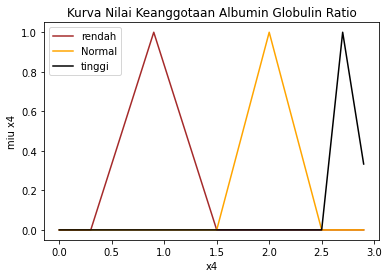

In [ ]:
# Pembentukan Himpunan Fuzzy Albumin Globulin Ratio	[fungsi buat sendiri]
x_AGR = np.arange(0, 3, 0.1) # Semesta Pembicaraan
amb_rendah  = [0.3, 0.9, 1.5]
amb_normal = [1.5, 2, 2.5]
amb_tinggi = [2.5, 2.7, 3]

miu_AGR_rendah  = fungsi_segitiga(x_AGR, amb_rendah)
miu_AGR_normal  = fungsi_segitiga(x_AGR, amb_normal)
miu_AGR_tinggi  = fungsi_segitiga(x_AGR, amb_tinggi)

import matplotlib.pyplot as plt
plt.plot(x_AGR, miu_AGR_rendah, label = "rendah", color='brown')
plt.plot(x_AGR, miu_AGR_normal, label = "Normal", color='orange')
plt.plot(x_AGR, miu_AGR_tinggi, label = "tinggi", color='black')

plt.xlabel('x4')
plt.ylabel('miu x4')
plt.title('Kurva Nilai Keanggotaan Albumin Globulin Ratio')
plt.legend()
plt.show()

In [ ]:
# Pembentukan Himpunan Fuzzy Liver Disease [fungsi buat sendiri]
x_Liver_Disease= np.arange(1, 2, 0.1) # Semesta Pembicaraan
amb_nonliver  = [1, 2, 2]
amb_liver = [1, 1, 2]

miu_Liver_Disease_nonliver  = fungsi_segitiga(x_Liver_Disease, amb_nonliver)
miu_Liver_Disease_liver   = fungsi_segitiga(x_Liver_Disease, amb_liver)

import matplotlib.pyplot as plt
plt.plot(x_Liver_Disease, miu_Liver_Disease_nonliver, label = "Non liver", color='orange')
plt.plot(x_Liver_Disease, miu_Liver_Disease_liver, label = "liver",  color='brown')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Liver Disease')
plt.legend()
plt.show()

AssertionError: ignored

#Perhitungan Nilai Miu

In [ ]:
#miu x1 (Age)
def fuzzyfikasi(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-66
    tengah = awal+20
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x2 (Total Protein)
def fuzzyfikasi2(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-6.3
    tengah = batas+2.3
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x3 (Direct Bilirubin)
def fuzzyfikasi3(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = ((max(x_array)+min(x_array))/6)
    awal = batas-3
    tengah = batas+0.9
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x4 (Albumin dan Globulin Ratio)
def fuzzyfikasi4(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-1.6
    tengah = batas+1
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu y
def fuzzyfikasi5(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))
    awal = batas-2
    print(batas)
    print(awal)
    hasil1=0
    if x < awal:
        hasil1=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil1 = label_1
    else:
        hasil1=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil1 = label_2
    return hasil1, label_hasil1

In [ ]:
#miu x1
x_Age= np.arange(10, 91, 0.1) # Semesta Pembicaraan
amb_muda = [10, 22, 35]
amb_paruhbaya = [35, 45, 55]
amb_tua = [55, 73, 91]

fuzzifikasi_Age=[]
miu_Age=[]
for i in df.Age:
    hasil=fuzzyfikasi(x_Age, amb_muda, amb_paruhbaya, amb_tua, i, "Muda", "Paruh baya", "Tua")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_Age.append(fuzz)
    miu_Age.append(m)
    
len(fuzzifikasi_Age)

In [ ]:
#miu x2
x_TP = np.arange(2, 9.6, 0.1) # Semesta Pembicaraan
amb_rendah  = [2.6, 4.3, 6]
amb_normal  = [6, 7.2, 8.3]
amb_tinggi = [8.3, 9, 9.6]

fuzzifikasi_TP=[]
miu_TP=[]
for i in df.TP:
    hasil=fuzzyfikasi2(x_TP, amb_rendah, amb_normal, amb_tinggi, i, "Rendah", "Normal", "Tinggi")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_TP.append(fuzz)
    miu_TP.append(m)

len(fuzzifikasi_TP)

In [ ]:
#miu x3
x_DB = np.arange(0, 19.8, 0.1) # Semesta Pembicaraan
amb_menurun = [0, 0.2, 0.3]
amb_normal = [0.3, 0.8, 1.2]
amb_meningkat = [1.2, 10.5, 19.8]

fuzzifikasi_DB=[]
miu_DB=[]
for i in df.DB:
    hasil=fuzzyfikasi3(x_DB, amb_menurun, amb_normal, amb_meningkat, i, "Menurun", "Normal", "Meningkat")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_DB.append(fuzz)
    miu_DB.append(m)
len(fuzzifikasi_DB)

In [ ]:
#miu x4
x_AGR = np.arange(0, 3, 0.1) # Semesta Pembicaraan
amb_rendah  = [0.3, 0.9, 1.5]
amb_normal = [1.5, 2, 2.5]
amb_tinggi = [2.5, 2.7, 3]

fuzzifikasi_AGR=[]
miu_AGR=[]
for i in df.AGR:
    hasil=fuzzyfikasi4(x_AGR, amb_rendah, amb_normal, amb_tinggi, i, "Rendah", "Normal", "Tinggi")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_AGR.append(fuzz)
    miu_AGR.append(m)
len(fuzzifikasi_AGR)

In [ ]:
#Miu y
x_Liver_Disease= np.arange(1, 2, 0.1) # Semesta Pembicaraan
amb_liver  = [2, 1, 1]
amb_nonliver = [2, 2, 1]

fuzzifikasi_Liver_Disease=[]
miu_Liver_Disease=[]
for i in df.Liver_Disease:
    hasil=fuzzyfikasi5(x_Liver_Disease, amb_liver, amb_nonliver, i, "Liver", "Nonliver")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_Liver_Disease.append(fuzz)
    miu_Liver_Disease.append(m)
len(fuzzifikasi_Liver_Disease)

In [ ]:
df_fuzz = pd.DataFrame({"Age":df.Age,
                        "TP":df.TP,
                        "DB":df.DB,
                        "AGR":df.AGR,
                        "Liver_Disease":df.Liver_Disease,
                        "Age_fuzz": fuzzifikasi_Age,
                        "TP_fuzz": fuzzifikasi_TP,
                        "DB_fuzz": fuzzifikasi_DB,
                        "AGR_fuzz": fuzzifikasi_AGR,
                        "Liver_Disease_fuzz":fuzzifikasi_Liver_Disease,
                        "miu_Age":miu_Age,
                        "miu_TP":miu_TP,
                        "miu_DB":miu_DB,
                        "miu_AGR":miu_AGR,
                        "miu_Liver_Disease": miu_Liver_Disease})
df_fuzz

# Rule Generation

In [ ]:
df_fuzz['Rule'] = " Jika X1 " + df_fuzz['Age_fuzz'] + " dan X2 " + df_fuzz['TP_fuzz'] + " dan X3 " + df_fuzz['DB_fuzz'] +" dan X4 " + df_fuzz['AGR_fuzz'] + " maka Y " + df_fuzz['Liver_Disease_fuzz']
df_fuzz

In [ ]:
df_fuzz.to_excel('hasilRuleMBGD.xlsx') 

In [ ]:
df_fuzz['Rule'].value_counts()

# TSK Prediction

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Rule 1

In [ ]:
rule_1 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Nonliver"]
index=rule_1.index
data_rule_1=df_fuzz.iloc[index,:5]
X1=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y1=np.array(data_rule_1.iloc[:,2])
data_rule_1.head()

In [ ]:
data_rule_1.to_csv('hasilrule1.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule1=pd.read_csv('hasilrule1.csv',sep=',')
df_rule1

In [ ]:
df_rule1=df_rule1.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_rule1

In [ ]:
from sklearn import preprocessing
sx1 = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()

scaled_X1 = sx1.fit_transform(data_rule_1.drop('Liver_Disease',axis='columns'))
scaled_y1 = sy1.fit_transform(data_rule_1['Liver_Disease'].values.reshape(rule_1.shape[0],1))

scaled_X1

In [ ]:
scaled_y1_reshape=scaled_y1.reshape(scaled_y1.shape[0],)
scaled_y1_reshape

In [ ]:
def mini_batch_gradient_descent_rule1(X1, y1, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule1 = X1.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
    b0_rule1 = 0                                         # b0 atau bias
    n = X1.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule1_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule1_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule1_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule1 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X1_smntr = X1[random_indices]
        y1_smntr = y1[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule1 = X1_smntr[j:j+batch_size]
            yj_rule1 = y1_smntr[j:j+batch_size]
            
            y1_pred = np.dot(bpoly_rule1, Xj_rule1.T) + b0_rule1           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule1_grad = -(2/len(Xj_rule1))*(Xj_rule1.T.dot(yj_rule1-y1_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule1_grad = -(2/len(Xj_rule1))*np.sum(yj_rule1-y1_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule1 = bpoly_rule1 - learning_rate * bpoly_rule1_grad        # Memperbaharui bpoly(bobot) setiap iterasi
            b0_rule1 = b0_rule1 - learning_rate * b0_rule1_grad                 # Memperbaharui bpoly(bobot) setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule1 in range(jumlah_variabel_rule1):
                bp_rule1=bpoly_rule1[jv_rule1]
                bp.append(bp_rule1)
            b_rule1=[b0_rule1]+bp
        
            cost_rule1 = np.mean(np.square(yj_rule1-y1_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule1_list.append(cost_rule1)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule1_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule1_list.append(b_rule1)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule1, b0_rule1, cost_rule1, b_rule1_list, cost_rule1_list, iterasi_rule1_list  # Output

In [ ]:
import time
mulai_rule1 = time.time()
mb_bpoly_rule1, mb_b0_rule1, mb_cost_rule1, mb_b_rule1_list, mb_cost_rule1_list, mb_iterasi_rule1_list=mini_batch_gradient_descent_rule1 (scaled_X1, 
                                                                                                                                        scaled_y1_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule1 = time.time()
waktu_komputasi_rule1 = (selesai_rule1 - mulai_rule1)
print("Waktu Komputasi Rule 1: ",waktu_komputasi_rule1)

In [ ]:
plt.xlabel("Iterasi Rule 1")
plt.ylabel("cost Rule 1")
plt.title("Mini Batch Gradient Descent Rule 1")
plt.plot(mb_iterasi_rule1_list,mb_cost_rule1_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule1

In [ ]:
mb_b0_rule1

In [ ]:
mb_bpoly_rule1 #hasil untuk x1 dan x2

In [ ]:
data_rule_1

In [ ]:
X1=np.array(data_rule_1.iloc[::,:-1])
X1

In [ ]:
Y1=np.array(data_rule_1.iloc[:,3])  #mengambil angka dari kolom
Y1

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X1_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X1_poly, Y1) 
# Proses Training Model
poly_reg.fit(X1, Y1) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y1_pred=lin_reg_2.predict(poly_reg.fit_transform(X1))
y1_pred

data_rule_1['pred'] = y1_pred
data_rule_1

##Rule 2


In [ ]:
rule_2 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Nonliver"]
index=rule_2.index
data_rule_2=df_fuzz.iloc[index,:5]
data_rule_2

In [ ]:
data_rule_2.to_csv('hasilrule2.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule2=pd.read_csv('hasilrule2.csv',sep=',')
df_rule2

In [ ]:
df_rule2=df_rule2.drop(columns=['Unnamed: 0'])
df_rule2

In [ ]:
from sklearn import preprocessing
sx2 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

scaled_X2 = sx2.fit_transform(data_rule_2.drop('Liver_Disease',axis='columns'))
scaled_y2 = sy2.fit_transform(data_rule_2['Liver_Disease'].values.reshape(rule_2.shape[0],1))

scaled_X2

In [ ]:
scaled_y2_reshape=scaled_y2.reshape(scaled_y2.shape[0],)
scaled_y2_reshape

In [ ]:
def mini_batch_gradient_descent_rule2(X2, y2, iterasi, batch_size = 5, learning_rate = 0.0001):

    jumlah_variabel_rule2 = X2.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule2 = np.ones(shape=(jumlah_variabel_rule2))       # b1, b2, ... b(jumlah variabel)
    b0_rule2 = 0                                         # b0 atau bias
    n = X2.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule2_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule2_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule2_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule2 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X2_smntr = X2[random_indices]
        y2_smntr = y2[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule2 = X2_smntr[j:j+batch_size]
            yj_rule2 = y2_smntr[j:j+batch_size]
            
            y2_pred = np.dot(bpoly_rule2, Xj_rule2.T) + b0_rule2           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule2_grad = -(2/len(Xj_rule2))*(Xj_rule2.T.dot(yj_rule2-y2_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule2_grad = -(2/len(Xj_rule2))*np.sum(yj_rule2-y2_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule2 = bpoly_rule2 - learning_rate * bpoly_rule2_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule2 = b0_rule2 - learning_rate * b0_rule2_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule2 in range(jumlah_variabel_rule2):
                bp_rule2=bpoly_rule2[jv_rule2]
                bp.append(bp_rule2)
            b_rule2=[b0_rule2]+bp
        
            cost_rule2 = np.mean(np.square(yj_rule2-y2_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule2_list.append(cost_rule2)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule2_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule2_list.append(b_rule2)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule2, b0_rule2, cost_rule2, b_rule2_list, cost_rule2_list, iterasi_rule2_list  # Output

In [ ]:
import time
mulai_rule2 = time.time()
mb_bpoly_rule2, mb_b0_rule2, mb_cost_rule2, mb_b_rule2_list, mb_cost_rule2_list, mb_iterasi_rule2_list=mini_batch_gradient_descent_rule2 (scaled_X2, 
                                                                                                                                        scaled_y2_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule2 = time.time()
waktu_komputasi_rule2 = (selesai_rule2 - mulai_rule2)
print("Waktu Komputasi Rule 2: ",waktu_komputasi_rule2)

In [ ]:
plt.xlabel("Iterasi Rule 2")
plt.ylabel("cost Rule 2")
plt.title("Mini Batch Gradient Descent Rule 2")
plt.plot(mb_iterasi_rule2_list,mb_cost_rule2_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule2

In [ ]:
mb_b0_rule2

In [ ]:
mb_bpoly_rule2 #hasil untuk x1 dan x2

In [ ]:
data_rule_2

In [ ]:
X2=np.array(data_rule_2.iloc[::,:-1])
X2

In [ ]:
Y2=np.array(data_rule_2.iloc[:,3])
Y2

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X2_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_poly, Y2) 
# Proses Training Model
poly_reg.fit(X2, Y2) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y2_pred=lin_reg_2.predict(poly_reg.fit_transform(X2))
y2_pred

data_rule_2['pred'] = y2_pred
data_rule_2

##Rule 3

In [ ]:
rule_3 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Nonliver"]
index=rule_3.index
data_rule_3=df_fuzz.iloc[index,:5]
data_rule_3

In [ ]:
data_rule_3.to_csv('hasilrule3.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule3=pd.read_csv('hasilrule3.csv',sep=',')
df_rule3

In [ ]:
#df_rule3=df_rule3.drop(columns=['Unnamed: 0'])
#df_rule3

In [ ]:
from sklearn import preprocessing
sx3 = preprocessing.MinMaxScaler()
sy3 = preprocessing.MinMaxScaler()

scaled_X3 = sx3.fit_transform(data_rule_3.drop('Liver_Disease',axis='columns'))
scaled_y3 = sy3.fit_transform(data_rule_3['Liver_Disease'].values.reshape(rule_3.shape[0],1))

scaled_X3

In [ ]:
scaled_y3_reshape=scaled_y3.reshape(scaled_y3.shape[0],)
scaled_y3_reshape

In [ ]:
def mini_batch_gradient_descent_rule3(X3, y3, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule3 = X3.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule3 = np.ones(shape=(jumlah_variabel_rule3))       # b1, b2, ... b(jumlah variabel)
    b0_rule3 = 0                                         # b0 atau bias
    n = X3.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule3_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule3_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule3_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule3 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X3_smntr = X3[random_indices]
        y3_smntr = y3[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule3 = X3_smntr[j:j+batch_size]
            yj_rule3 = y3_smntr[j:j+batch_size]
            
            y3_pred = np.dot(bpoly_rule3, Xj_rule3.T) + b0_rule3           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule3_grad = -(2/len(Xj_rule3))*(Xj_rule3.T.dot(yj_rule3-y3_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule3_grad = -(2/len(Xj_rule3))*np.sum(yj_rule3-y3_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule3 = bpoly_rule3 - learning_rate * bpoly_rule3_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule3 = b0_rule3 - learning_rate * b0_rule3_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule3 in range(jumlah_variabel_rule3):
                bp_rule3=bpoly_rule3[jv_rule3]
                bp.append(bp_rule3)
            b_rule3=[b0_rule3]+bp
        
            cost_rule3 = np.mean(np.square(yj_rule3-y3_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule3_list.append(cost_rule3)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule3_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule3_list.append(b_rule3)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule3, b0_rule3, cost_rule3, b_rule3_list, cost_rule3_list, iterasi_rule3_list  # Output

In [ ]:
import time
mulai_rule3 = time.time()
mb_bpoly_rule3, mb_b0_rule3, mb_cost_rule3, mb_b_rule3_list, mb_cost_rule3_list, mb_iterasi_rule3_list=mini_batch_gradient_descent_rule3 (scaled_X3, 
                                                                                                                                        scaled_y3_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule3 = time.time()
waktu_komputasi_rule3 = (selesai_rule3 - mulai_rule3)
print("Waktu Komputasi Rule 3: ",waktu_komputasi_rule3)

In [ ]:
plt.xlabel("Iterasi Rule 3")
plt.ylabel("cost Rule 3")
plt.title("Mini Batch Gradient Descent Rule 3")
plt.plot(mb_iterasi_rule3_list,mb_cost_rule3_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule3

In [ ]:
mb_b0_rule3

In [ ]:
mb_bpoly_rule3 #hasil untuk x1 dan x2

In [ ]:
data_rule_3

In [ ]:
X3=np.array(data_rule_3.iloc[::,:-1])
X3

In [ ]:
Y3=np.array(data_rule_3.iloc[:,3])
Y3

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X3_poly = poly_reg.fit_transform(X3)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X3_poly, Y3) 
# Proses Training Model
poly_reg.fit(X3, Y3) 

# Memprediksi hasil dengan regresi polynomial
y3_pred=lin_reg_2.predict(poly_reg.fit_transform(X3))
y3_pred

data_rule_3['pred'] = y3_pred
data_rule_3

##Rule 4

In [ ]:
rule_4 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Nonliver"]
index=rule_4.index
data_rule_4=df_fuzz.iloc[index,:5]
data_rule_4

In [ ]:
data_rule_4.to_csv('hasilrule4.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule4=pd.read_csv('hasilrule4.csv',sep=',')
df_rule4

In [ ]:
#df_rule4=df_rule4.drop(columns=['Unnamed: 0'])
#df_rule4

In [ ]:
from sklearn import preprocessing
sx4 = preprocessing.MinMaxScaler()
sy4 = preprocessing.MinMaxScaler()

scaled_X4 = sx4.fit_transform(data_rule_4.drop('Liver_Disease',axis='columns'))
scaled_y4 = sy4.fit_transform(data_rule_4['Liver_Disease'].values.reshape(rule_4.shape[0],1))

scaled_X4

In [ ]:
scaled_y4_reshape=scaled_y4.reshape(scaled_y4.shape[0],)
scaled_y4_reshape

In [ ]:
def mini_batch_gradient_descent_rule4(X4, y4, iterasi, batch_size = 4, learning_rate = 0.0001):

    jumlah_variabel_rule4 = X4.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule4 = np.ones(shape=(jumlah_variabel_rule4))       # b1, b2, ... b(jumlah variabel)
    b0_rule4 = 0                                         # b0 atau bias
    n = X4.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule4_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule4_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule4_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule4 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X4_smntr = X4[random_indices]
        y4_smntr = y4[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule4 = X4_smntr[j:j+batch_size]
            yj_rule4 = y4_smntr[j:j+batch_size]
            
            y4_pred = np.dot(bpoly_rule4, Xj_rule4.T) + b0_rule4           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule4_grad = -(2/len(Xj_rule4))*(Xj_rule4.T.dot(yj_rule4-y4_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule4_grad = -(2/len(Xj_rule4))*np.sum(yj_rule4-y4_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule4 = bpoly_rule4 - learning_rate * bpoly_rule4_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule4 = b0_rule4 - learning_rate * b0_rule4_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule4 in range(jumlah_variabel_rule4):
                bp_rule4=bpoly_rule4[jv_rule4]
                bp.append(bp_rule4)
            b_rule4=[b0_rule4]+bp
        
            cost_rule4 = np.mean(np.square(yj_rule4-y4_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule4_list.append(cost_rule4)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule4_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule4_list.append(b_rule4)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule4, b0_rule4, cost_rule4, b_rule4_list, cost_rule4_list, iterasi_rule4_list  # Output

In [ ]:
import time
mulai_rule4 = time.time()
mb_bpoly_rule4, mb_b0_rule4, mb_cost_rule4, mb_b_rule4_list, mb_cost_rule4_list, mb_iterasi_rule4_list=mini_batch_gradient_descent_rule4 (scaled_X4, 
                                                                                                                                        scaled_y4_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule4 = time.time()
waktu_komputasi_rule4 = (selesai_rule4 - mulai_rule4)
print("Waktu Komputasi Rule 4: ",waktu_komputasi_rule4)

In [ ]:
plt.xlabel("Iterasi Rule 4")
plt.ylabel("cost Rule 4")
plt.title("Mini Batch Gradient Descent Rule 4")
plt.plot(mb_iterasi_rule4_list,mb_cost_rule4_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule4

In [ ]:
mb_b0_rule4

In [ ]:
mb_bpoly_rule4 #hasil untuk x1 dan x2

In [ ]:
data_rule_4

In [ ]:
X4=np.array(data_rule_4.iloc[::,:-1])
X4

In [ ]:
Y4=np.array(data_rule_4.iloc[:,3])
Y4

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X4_poly = poly_reg.fit_transform(X4)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X4_poly, Y4) 
# Proses Training Model
poly_reg.fit(X4, Y4) 

# Memprediksi hasil dengan regresi polynomial
y4_pred=lin_reg_2.predict(poly_reg.fit_transform(X4))
y4_pred

data_rule_4['pred'] = y4_pred
data_rule_4

##Rule 5

In [ ]:
rule_5 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Nonliver"]
index=rule_5.index
data_rule_5=df_fuzz.iloc[index,:5]
data_rule_5

In [ ]:
data_rule_5.to_csv('hasilrule5.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule5=pd.read_csv('hasilrule5.csv',sep=',')
df_rule5

In [ ]:
df_rule5=df_rule5.drop(columns=['Unnamed: 0'])
df_rule5

In [ ]:
from sklearn import preprocessing
sx5 = preprocessing.MinMaxScaler()
sy5 = preprocessing.MinMaxScaler()

scaled_X5 = sx5.fit_transform(data_rule_5.drop('Liver_Disease',axis='columns'))
scaled_y5 = sy5.fit_transform(data_rule_5['Liver_Disease'].values.reshape(rule_5.shape[0],1))

scaled_X5

In [ ]:
scaled_y5_reshape=scaled_y5.reshape(scaled_y5.shape[0],)
scaled_y5_reshape

In [ ]:
def mini_batch_gradient_descent_rule5(X5, y5, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule5 = X5.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule5 = np.ones(shape=(jumlah_variabel_rule5))       # b1, b2, ... b(jumlah variabel)
    b0_rule5 = 0                                         # b0 atau bias
    n = X5.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule5_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule5_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule5_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule5 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X5_smntr = X5[random_indices]
        y5_smntr = y5[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule5 = X5_smntr[j:j+batch_size]
            yj_rule5 = y5_smntr[j:j+batch_size]
            
            y5_pred = np.dot(bpoly_rule5, Xj_rule5.T) + b0_rule5          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule5_grad = -(2/len(Xj_rule5))*(Xj_rule5.T.dot(yj_rule5-y5_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule5_grad = -(2/len(Xj_rule5))*np.sum(yj_rule5-y5_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule5 = bpoly_rule5 - learning_rate * bpoly_rule5_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule5 = b0_rule5 - learning_rate * b0_rule5_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule5 in range(jumlah_variabel_rule5):
                bp_rule5=bpoly_rule5[jv_rule5]
                bp.append(bp_rule5)
            b_rule5=[b0_rule5]+bp
        
            cost_rule5 = np.mean(np.square(yj_rule5-y5_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule5_list.append(cost_rule5)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule5_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule5_list.append(b_rule5)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule5, b0_rule5, cost_rule5, b_rule5_list, cost_rule5_list, iterasi_rule5_list  # Output

In [ ]:
import time
mulai_rule5 = time.time()
mb_bpoly_rule5, mb_b0_rule5, mb_cost_rule5, mb_b_rule5_list, mb_cost_rule5_list, mb_iterasi_rule5_list=mini_batch_gradient_descent_rule5 (scaled_X5, 
                                                                                                                                        scaled_y5_reshape,
                                                                                                                                        iterasi=1000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule5 = time.time()
waktu_komputasi_rule5 = (selesai_rule5 - mulai_rule5)
print("Waktu Komputasi Rule 5: ",waktu_komputasi_rule5)

In [ ]:
plt.xlabel("Iterasi Rule 5")
plt.ylabel("cost Rule 5")
plt.title("Mini Batch Gradient Descent Rule 5")
plt.plot(mb_iterasi_rule5_list,mb_cost_rule5_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule5

In [ ]:
mb_b0_rule5

In [ ]:
mb_bpoly_rule5 #hasil untuk x1 dan x2

In [ ]:
data_rule_5

In [ ]:
X5=np.array(data_rule_5.iloc[::,:-1])
X5

In [ ]:
Y5=np.array(data_rule_5.iloc[:,3])
Y5

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X5_poly = poly_reg.fit_transform(X5)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X5_poly, Y5) 
# Proses Training Model
poly_reg.fit(X5, Y5) 

# Memprediksi hasil dengan regresi polynomial
y5_pred=lin_reg_2.predict(poly_reg.fit_transform(X5))
y5_pred

data_rule_5['pred'] = y5_pred
data_rule_5

##Rule 6

In [ ]:
rule_6 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Liver"]
index=rule_6.index
data_rule_6=df_fuzz.iloc[index,:5]
data_rule_6

In [ ]:
data_rule_6.to_csv('hasilrule6.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule6=pd.read_csv('hasilrule6.csv',sep=',')
df_rule6

In [ ]:
df_rule6=df_rule6.drop(columns=['Unnamed: 0'])
df_rule6

In [ ]:
from sklearn import preprocessing
sx6 = preprocessing.MinMaxScaler()
sy6 = preprocessing.MinMaxScaler()

scaled_X6 = sx6.fit_transform(data_rule_6.drop('Liver_Disease',axis='columns'))
scaled_y6 = sy6.fit_transform(data_rule_6['Liver_Disease'].values.reshape(rule_6.shape[0],1))

scaled_X6

In [ ]:
scaled_y6_reshape=scaled_y6.reshape(scaled_y6.shape[0],)
scaled_y6_reshape

In [ ]:
def mini_batch_gradient_descent_rule6(X6, y6, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule6 = X6.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule6 = np.ones(shape=(jumlah_variabel_rule6))       # b1, b2, ... b(jumlah variabel)
    b0_rule6 = 0                                         # b0 atau bias
    n = X6.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule6_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule6_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule6_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule6 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X6_smntr = X6[random_indices]
        y6_smntr = y6[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule6 = X6_smntr[j:j+batch_size]
            yj_rule6 = y6_smntr[j:j+batch_size]
            
            y6_pred = np.dot(bpoly_rule6, Xj_rule6.T) + b0_rule6          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule6_grad = -(2/len(Xj_rule6))*(Xj_rule6.T.dot(yj_rule6-y6_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule6_grad = -(2/len(Xj_rule6))*np.sum(yj_rule6-y6_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule6 = bpoly_rule6 - learning_rate * bpoly_rule6_grad        # Memperbaharui bpoly(bobot) setiap iterasi 
            b0_rule6 = b0_rule6 - learning_rate * b0_rule6_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule6 in range(jumlah_variabel_rule6):
                bp_rule6=bpoly_rule6[jv_rule6]
                bp.append(bp_rule6)
            b_rule6=[b0_rule6]+bp
        
            cost_rule6 = np.mean(np.square(yj_rule6-y6_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule6_list.append(cost_rule6)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule6_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule6_list.append(b_rule6)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule6, b0_rule6, cost_rule6, b_rule6_list, cost_rule6_list, iterasi_rule6_list  # Output

In [ ]:
import time
mulai_rule6 = time.time()
mb_bpoly_rule6, mb_b0_rule6, mb_cost_rule6, mb_b_rule6_list, mb_cost_rule6_list, mb_iterasi_rule6_list=mini_batch_gradient_descent_rule6 (scaled_X6, 
                                                                                                                                        scaled_y6_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule6 = time.time()
waktu_komputasi_rule6 = (selesai_rule6 - mulai_rule6)
print("Waktu Komputasi Rule 6: ",waktu_komputasi_rule6)

In [ ]:
plt.xlabel("Iterasi Rule 6")
plt.ylabel("cost Rule 6")
plt.title("Mini Batch Gradient Descent Rule 6")
plt.plot(mb_iterasi_rule6_list,mb_cost_rule6_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule6

In [ ]:
mb_b0_rule6

In [ ]:
mb_bpoly_rule6 #hasil untuk x1 dan x2

In [ ]:
data_rule_6

In [ ]:
X6=np.array(data_rule_6.iloc[::,:-1])
X6

In [ ]:
Y6=np.array(data_rule_6.iloc[:,3])
Y6

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X6_poly = poly_reg.fit_transform(X6)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X6_poly, Y6) 
# Proses Training Model
poly_reg.fit(X6, Y6) 

# Memprediksi hasil dengan regresi polynomial
y6_pred=lin_reg_2.predict(poly_reg.fit_transform(X6))
y6_pred

data_rule_6['pred'] = y6_pred
data_rule_6

##Rule 7

In [ ]:
rule_7 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Nonliver"]
index=rule_7.index
data_rule_7=df_fuzz.iloc[index,:5]
data_rule_7

In [ ]:
data_rule_7.to_csv('hasilrule7.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule7=pd.read_csv('hasilrule7.csv',sep=',')
df_rule7

In [ ]:
df_rule7=df_rule7.drop(columns=['Unnamed: 0'])
df_rule7

In [ ]:
from sklearn import preprocessing
sx7 = preprocessing.MinMaxScaler()
sy7 = preprocessing.MinMaxScaler()

scaled_X7 = sx7.fit_transform(data_rule_7.drop('Liver_Disease',axis='columns'))
scaled_y7 = sy7.fit_transform(data_rule_7['Liver_Disease'].values.reshape(rule_7.shape[0],1))

scaled_X7

In [ ]:
scaled_y7_reshape=scaled_y7.reshape(scaled_y7.shape[0],)
scaled_y7_reshape

In [ ]:
def mini_batch_gradient_descent_rule7(X7, y7, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule7 = X7.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule7 = np.ones(shape=(jumlah_variabel_rule7))       # b1, b2, ... b(jumlah variabel)
    b0_rule7 = 0                                         # b0 atau bias
    n = X7.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule7_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule7_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule7_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule7 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X7_smntr = X7[random_indices]
        y7_smntr = y7[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule7 = X7_smntr[j:j+batch_size]
            yj_rule7 = y7_smntr[j:j+batch_size]
            
            y7_pred = np.dot(bpoly_rule7, Xj_rule7.T) + b0_rule7          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule7_grad = -(2/len(Xj_rule7))*(Xj_rule7.T.dot(yj_rule7-y7_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule7_grad = -(2/len(Xj_rule7))*np.sum(yj_rule7-y7_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule7 = bpoly_rule7 - learning_rate * bpoly_rule7_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule7 = b0_rule7 - learning_rate * b0_rule7_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule7 in range(jumlah_variabel_rule7):
                bp_rule7=bpoly_rule7[jv_rule7]
                bp.append(bp_rule7)
            b_rule7=[b0_rule7]+bp
        
            cost_rule7 = np.mean(np.square(yj_rule7-y7_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule7_list.append(cost_rule7)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule7_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule7_list.append(b_rule7)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule7, b0_rule7, cost_rule7, b_rule7_list, cost_rule7_list, iterasi_rule7_list  # Output

In [ ]:
import time
mulai_rule7 = time.time()
mb_bpoly_rule7, mb_b0_rule7, mb_cost_rule7, mb_b_rule7_list, mb_cost_rule7_list, mb_iterasi_rule7_list=mini_batch_gradient_descent_rule7 (scaled_X7, 
                                                                                                                                        scaled_y7_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule7 = time.time()
waktu_komputasi_rule7 = (selesai_rule7 - mulai_rule7)
print("Waktu Komputasi Rule 7: ",waktu_komputasi_rule7)

In [ ]:
plt.xlabel("Iterasi Rule 7")
plt.ylabel("cost Rule 7")
plt.title("Mini Batch Gradient Descent Rule 7")
plt.plot(mb_iterasi_rule7_list,mb_cost_rule7_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule7

In [ ]:
mb_b0_rule7

In [ ]:
mb_bpoly_rule7

In [ ]:
data_rule_7

In [ ]:
X7=np.array(data_rule_7.iloc[::,:-1])
X7

In [ ]:
Y7=np.array(data_rule_7.iloc[:,3])
Y7

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X7_poly = poly_reg.fit_transform(X7)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X7_poly, Y7) 
# Proses Training Model
poly_reg.fit(X7, Y7) 

# Memprediksi hasil dengan regresi polynomial
y7_pred=lin_reg_2.predict(poly_reg.fit_transform(X7))
y7_pred

data_rule_7['pred'] = y7_pred
data_rule_7

##Rule 8

In [ ]:
rule_8 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Liver"]
index=rule_8.index
data_rule_8=df_fuzz.iloc[index,:5]
data_rule_8

In [ ]:
data_rule_8.to_csv('hasilrule8.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule8=pd.read_csv('hasilrule8.csv',sep=',')
df_rule8

In [ ]:
df_rule8=df_rule8.drop(columns=['Unnamed: 0'])
df_rule8

In [ ]:
from sklearn import preprocessing
sx8 = preprocessing.MinMaxScaler()
sy8 = preprocessing.MinMaxScaler()

scaled_X8 = sx8.fit_transform(data_rule_8.drop('Liver_Disease',axis='columns'))
scaled_y8 = sy8.fit_transform(data_rule_8['Liver_Disease'].values.reshape(rule_8.shape[0],1))

scaled_X8

In [ ]:
scaled_y8_reshape=scaled_y8.reshape(scaled_y8.shape[0],)
scaled_y8_reshape

In [ ]:
def mini_batch_gradient_descent_rule8(X8, y8, iterasi, batch_size = 5, learning_rate = 0.0001):

    jumlah_variabel_rule8 = X8.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule8 = np.ones(shape=(jumlah_variabel_rule8))       # b1, b2, ... b(jumlah variabel)
    b0_rule8 = 0                                         # b0 atau bias
    n = X8.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule8_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule8_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule8_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule8 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X8_smntr = X8[random_indices]
        y8_smntr = y8[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule8 = X8_smntr[j:j+batch_size]
            yj_rule8 = y8_smntr[j:j+batch_size]
            
            y8_pred = np.dot(bpoly_rule8, Xj_rule8.T) + b0_rule8          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule8_grad = -(2/len(Xj_rule8))*(Xj_rule8.T.dot(yj_rule8-y8_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule8_grad = -(2/len(Xj_rule8))*np.sum(yj_rule8-y8_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule8 = bpoly_rule8 - learning_rate * bpoly_rule8_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule8 = b0_rule8 - learning_rate * b0_rule8_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule8 in range(jumlah_variabel_rule8):
                bp_rule8=bpoly_rule8[jv_rule8]
                bp.append(bp_rule8)
            b_rule8=[b0_rule8]+bp
        
            cost_rule8 = np.mean(np.square(yj_rule8-y8_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule8_list.append(cost_rule8)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule8_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule8_list.append(b_rule8)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule8, b0_rule8, cost_rule8, b_rule8_list, cost_rule8_list, iterasi_rule8_list  # Output

In [ ]:
import time
mulai_rule8 = time.time()
mb_bpoly_rule8, mb_b0_rule8, mb_cost_rule8, mb_b_rule8_list, mb_cost_rule8_list, mb_iterasi_rule8_list=mini_batch_gradient_descent_rule8 (scaled_X8, 
                                                                                                                                        scaled_y8_reshape,
                                                                                                                                        iterasi=1000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule8 = time.time()
waktu_komputasi_rule8 = (selesai_rule8 - mulai_rule8)
print("Waktu Komputasi Rule 8: ",waktu_komputasi_rule8)

In [ ]:
plt.xlabel("Iterasi Rule 8")
plt.ylabel("cost Rule 8")
plt.title("Mini Batch Gradient Descent Rule 8")
plt.plot(mb_iterasi_rule8_list,mb_cost_rule8_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule8

In [ ]:
mb_b0_rule8

In [ ]:
mb_bpoly_rule8

In [ ]:
data_rule_8

In [ ]:
X8=np.array(data_rule_8.iloc[::,:-1])
X8

In [ ]:
Y8=np.array(data_rule_8.iloc[:,3])
Y8

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X8_poly = poly_reg.fit_transform(X8)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X8_poly, Y8) 
# Proses Training Model
poly_reg.fit(X8, Y8) 

# Memprediksi hasil dengan regresi polynomial
y8_pred=lin_reg_2.predict(poly_reg.fit_transform(X8))
y8_pred

data_rule_8['pred'] = y8_pred
data_rule_8

##Rule 9

In [ ]:
rule_9 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Liver"]
index=rule_9.index
data_rule_9=df_fuzz.iloc[index,:5]
data_rule_9

In [ ]:
data_rule_9.to_csv('hasilrule9.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule9=pd.read_csv('hasilrule9.csv',sep=',')
df_rule9

In [ ]:
df_rule9=df_rule9.drop(columns=['Unnamed: 0'])
df_rule9

In [ ]:
from sklearn import preprocessing
sx9 = preprocessing.MinMaxScaler()
sy9 = preprocessing.MinMaxScaler()

scaled_X9 = sx9.fit_transform(data_rule_9.drop('Liver_Disease',axis='columns'))
scaled_y9 = sy9.fit_transform(data_rule_9['Liver_Disease'].values.reshape(rule_9.shape[0],1))

scaled_X9

In [ ]:
scaled_y9_reshape=scaled_y9.reshape(scaled_y9.shape[0],)
scaled_y9_reshape

In [ ]:
def mini_batch_gradient_descent_rule9(X9, y9, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule9 = X9.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule9 = np.ones(shape=(jumlah_variabel_rule9))       # b1, b2, ... b(jumlah variabel)
    b0_rule9 = 0                                         # b0 atau bias
    n = X9.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule9_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule9_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule9_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule9 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X9_smntr = X9[random_indices]
        y9_smntr = y9[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule9 = X9_smntr[j:j+batch_size]
            yj_rule9 = y9_smntr[j:j+batch_size]
            
            y9_pred = np.dot(bpoly_rule9, Xj_rule9.T) + b0_rule9          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule9_grad = -(2/len(Xj_rule9))*(Xj_rule9.T.dot(yj_rule9-y9_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule9_grad = -(2/len(Xj_rule9))*np.sum(yj_rule9-y9_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule9 = bpoly_rule9 - learning_rate * bpoly_rule9_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule9 = b0_rule9 - learning_rate * b0_rule9_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule9 in range(jumlah_variabel_rule9):
                bp_rule9=bpoly_rule9[jv_rule9]
                bp.append(bp_rule9)
            b_rule9=[b0_rule9]+bp
        
            cost_rule9 = np.mean(np.square(yj_rule9-y9_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule9_list.append(cost_rule9)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule9_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule9_list.append(b_rule9)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule9, b0_rule9, cost_rule9, b_rule9_list, cost_rule9_list, iterasi_rule9_list  # Output

In [ ]:
import time
mulai_rule9 = time.time()
mb_bpoly_rule9, mb_b0_rule9, mb_cost_rule9, mb_b_rule9_list, mb_cost_rule9_list, mb_iterasi_rule9_list=mini_batch_gradient_descent_rule9 (scaled_X9, 
                                                                                                                                        scaled_y9_reshape,
                                                                                                                                        iterasi=1000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule9 = time.time()
waktu_komputasi_rule9 = (selesai_rule9 - mulai_rule9)
print("Waktu Komputasi Rule 9: ",waktu_komputasi_rule9)

In [ ]:
plt.xlabel("Iterasi Rule 9")
plt.ylabel("cost Rule 9")
plt.title("Mini Batch Gradient Descent Rule 9")
plt.plot(mb_iterasi_rule9_list,mb_cost_rule9_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule9

In [ ]:
mb_b0_rule9

In [ ]:
mb_bpoly_rule9

In [ ]:
data_rule_9

In [ ]:
X9=np.array(data_rule_9.iloc[::,:-1])
X9

In [ ]:
Y9=np.array(data_rule_9.iloc[:,3])
Y9

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X9_poly = poly_reg.fit_transform(X9)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X9_poly, Y9) 
# Proses Training Model
poly_reg.fit(X9, Y9) 

# Memprediksi hasil dengan regresi polynomial
y9_pred=lin_reg_2.predict(poly_reg.fit_transform(X9))
y9_pred

data_rule_9['pred'] = y9_pred
data_rule_9

##Rule 10

In [ ]:
rule_10 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Meningkat dan X4 Rendah maka Y Nonliver"]
index=rule_10.index
data_rule_10=df_fuzz.iloc[index,:5]
data_rule_10

In [ ]:
data_rule_10.to_csv('hasilrule10.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule10=pd.read_csv('hasilrule10.csv',sep=',')
df_rule10

In [ ]:
df_rule10=df_rule10.drop(columns=['Unnamed: 0'])
df_rule10

In [ ]:
from sklearn import preprocessing
sx10 = preprocessing.MinMaxScaler()
sy10 = preprocessing.MinMaxScaler()

scaled_X10 = sx10.fit_transform(data_rule_10.drop('Liver_Disease',axis='columns'))
scaled_y10 = sy10.fit_transform(data_rule_10['Liver_Disease'].values.reshape(rule_10.shape[0],1))

scaled_X10

In [ ]:
scaled_y10_reshape=scaled_y10.reshape(scaled_y10.shape[0],)
scaled_y10_reshape

In [ ]:
def mini_batch_gradient_descent_rule10(X10, y10, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule10 = X10.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule10 = np.ones(shape=(jumlah_variabel_rule10))       # b1, b2, ... b(jumlah variabel)
    b0_rule10 = 0                                         # b0 atau bias
    n = X10.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule10_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule10_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule10_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule10 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X10_smntr = X10[random_indices]
        y10_smntr = y10[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule10 = X10_smntr[j:j+batch_size]
            yj_rule10 = y10_smntr[j:j+batch_size]
            
            y10_pred = np.dot(bpoly_rule10, Xj_rule10.T) + b0_rule10          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule10_grad = -(2/len(Xj_rule10))*(Xj_rule10.T.dot(yj_rule10-y10_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule10_grad = -(2/len(Xj_rule10))*np.sum(yj_rule10-y10_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule10 = bpoly_rule10 - learning_rate * bpoly_rule10_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule10 = b0_rule10 - learning_rate * b0_rule10_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule10 in range(jumlah_variabel_rule10):
                bp_rule10=bpoly_rule10[jv_rule10]
                bp.append(bp_rule10)
            b_rule10=[b0_rule10]+bp
        
            cost_rule10 = np.mean(np.square(yj_rule10-y10_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule10_list.append(cost_rule10)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule10_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule10_list.append(b_rule10)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule10, b0_rule10, cost_rule10, b_rule10_list, cost_rule10_list, iterasi_rule10_list  # Output

In [ ]:
import time
mulai_rule10 = time.time()
mb_bpoly_rule10, mb_b0_rule10, mb_cost_rule10, mb_b_rule10_list, mb_cost_rule10_list, mb_iterasi_rule10_list=mini_batch_gradient_descent_rule10 (scaled_X10, 
                                                                                                                                        scaled_y10_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule10 = time.time()
waktu_komputasi_rule10 = (selesai_rule10 - mulai_rule10)
print("Waktu Komputasi Rule 10: ",waktu_komputasi_rule10)

In [ ]:
plt.xlabel("Iterasi Rule 10")
plt.ylabel("cost Rule 10")
plt.title("Mini Batch Gradient Descent Rule 10")
plt.plot(mb_iterasi_rule10_list,mb_cost_rule10_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule10

In [ ]:
mb_b0_rule10

In [ ]:
mb_bpoly_rule10

In [ ]:
data_rule_10

In [ ]:
X10=np.array(data_rule_10.iloc[::,:-1])
X10

In [ ]:
Y10=np.array(data_rule_10.iloc[:,3])
Y10

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X10_poly = poly_reg.fit_transform(X10)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X10_poly, Y10) 
# Proses Training Model
poly_reg.fit(X10, Y10) 

# Memprediksi hasil dengan regresi polynomial
y10_pred=lin_reg_2.predict(poly_reg.fit_transform(X10))
y10_pred

data_rule_10['pred'] = y10_pred
data_rule_10

##Rule 11

In [ ]:
#Rule 11
rule_11 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Liver"]
index=rule_11.index
data_rule_11=df_fuzz.iloc[index,:5]
data_rule_11

In [ ]:
data_rule_11.to_csv('hasilrule11.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule11=pd.read_csv('hasilrule11.csv',sep=',')
df_rule11

In [ ]:
df_rule11=df_rule11.drop(columns=['Unnamed: 0'])
df_rule11

In [ ]:
from sklearn import preprocessing
sx11 = preprocessing.MinMaxScaler()
sy11 = preprocessing.MinMaxScaler()

scaled_X11 = sx11.fit_transform(data_rule_11.drop('Liver_Disease',axis='columns'))
scaled_y11 = sy11.fit_transform(data_rule_11['Liver_Disease'].values.reshape(rule_11.shape[0],1))

scaled_X11

In [ ]:
scaled_y11_reshape=scaled_y11.reshape(scaled_y11.shape[0],)
scaled_y11_reshape

In [ ]:
def mini_batch_gradient_descent_rule11(X11, y11, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule11 = X11.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule11 = np.ones(shape=(jumlah_variabel_rule11))       # b1, b2, ... b(jumlah variabel)
    b0_rule11 = 0                                         # b0 atau bias
    n = X11.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule11_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule11_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule11_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule11 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X11_smntr = X11[random_indices]
        y11_smntr = y11[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule11 = X11_smntr[j:j+batch_size]
            yj_rule11 = y11_smntr[j:j+batch_size]
            
            y11_pred = np.dot(bpoly_rule11, Xj_rule11.T) + b0_rule11          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule11_grad = -(2/len(Xj_rule11))*(Xj_rule11.T.dot(yj_rule11-y11_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule11_grad = -(2/len(Xj_rule11))*np.sum(yj_rule11-y11_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule11 = bpoly_rule11 - learning_rate * bpoly_rule11_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule11 = b0_rule11 - learning_rate * b0_rule11_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule11 in range(jumlah_variabel_rule11):
                bp_rule11=bpoly_rule11[jv_rule11]
                bp.append(bp_rule11)
            b_rule11=[b0_rule11]+bp
        
            cost_rule11 = np.mean(np.square(yj_rule11-y11_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule11_list.append(cost_rule11)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule11_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule11_list.append(b_rule11)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule11, b0_rule11, cost_rule11, b_rule11_list, cost_rule11_list, iterasi_rule11_list  # Output

In [ ]:
import time
mulai_rule11 = time.time()
mb_bpoly_rule11, mb_b0_rule11, mb_cost_rule11, mb_b_rule11_list, mb_cost_rule11_list, mb_iterasi_rule11_list=mini_batch_gradient_descent_rule11 (scaled_X11, 
                                                                                                                                        scaled_y11_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule11 = time.time()
waktu_komputasi_rule11 = (selesai_rule11 - mulai_rule11)
print("Waktu Komputasi Rule 11: ",waktu_komputasi_rule11)

In [ ]:
plt.xlabel("Iterasi Rule 11")
plt.ylabel("cost Rule 11")
plt.title("Mini Batch Gradient Descent Rule 11")
plt.plot(mb_iterasi_rule11_list,mb_cost_rule11_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule11

In [ ]:
mb_b0_rule11

In [ ]:
mb_bpoly_rule11

In [ ]:
data_rule_11

In [ ]:
X11=np.array(data_rule_11.iloc[::,:-1])
X11

In [ ]:
Y11=np.array(data_rule_11.iloc[:,3])
Y11

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X11_poly = poly_reg.fit_transform(X11)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X11_poly, Y11) 
# Proses Training Model
poly_reg.fit(X11, Y11) 

# Memprediksi hasil dengan regresi polynomial
y11_pred=lin_reg_2.predict(poly_reg.fit_transform(X11))
y11_pred

data_rule_11['pred'] = y11_pred
data_rule_11

##Rule 12

In [ ]:
#Rule 12
rule_12 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal dan X3 Meningkat dan X4 Rendah maka Y Nonliver"]
index=rule_12.index
data_rule_12=df_fuzz.iloc[index,:5]
data_rule_12

In [ ]:
data_rule_12.to_csv('hasilrule12.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule12=pd.read_csv('hasilrule12.csv',sep=',')
df_rule12

In [ ]:
df_rule12=df_rule12.drop(columns=['Unnamed: 0'])
df_rule12

In [ ]:
from sklearn import preprocessing
sx12 = preprocessing.MinMaxScaler()
sy12 = preprocessing.MinMaxScaler()

scaled_X12 = sx12.fit_transform(data_rule_12.drop('Liver_Disease',axis='columns'))
scaled_y12 = sy12.fit_transform(data_rule_12['Liver_Disease'].values.reshape(rule_12.shape[0],1))

scaled_X12

In [ ]:
scaled_y12_reshape=scaled_y12.reshape(scaled_y12.shape[0],)
scaled_y12_reshape

In [ ]:
def mini_batch_gradient_descent_rule12(X12, y12, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule12 = X12.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule12 = np.ones(shape=(jumlah_variabel_rule12))       # b1, b2, ... b(jumlah variabel)
    b0_rule12 = 0                                         # b0 atau bias
    n = X12.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule12_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule12_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule12_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule12 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X12_smntr = X12[random_indices]
        y12_smntr = y12[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule12 = X12_smntr[j:j+batch_size]
            yj_rule12 = y12_smntr[j:j+batch_size]
            
            y12_pred = np.dot(bpoly_rule12, Xj_rule12.T) + b0_rule12          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule12_grad = -(2/len(Xj_rule12))*(Xj_rule12.T.dot(yj_rule12-y12_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule12_grad = -(2/len(Xj_rule12))*np.sum(yj_rule12-y12_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule12 = bpoly_rule12 - learning_rate * bpoly_rule12_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule12 = b0_rule12 - learning_rate * b0_rule12_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule12 in range(jumlah_variabel_rule12):
                bp_rule12=bpoly_rule12[jv_rule12]
                bp.append(bp_rule12)
            b_rule12=[b0_rule12]+bp
        
            cost_rule12 = np.mean(np.square(yj_rule12-y12_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule12_list.append(cost_rule12)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule12_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule12_list.append(b_rule12)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule12, b0_rule12, cost_rule12, b_rule12_list, cost_rule12_list, iterasi_rule12_list  # Output

In [ ]:
import time
mulai_rule12 = time.time()
mb_bpoly_rule12, mb_b0_rule12, mb_cost_rule12, mb_b_rule12_list, mb_cost_rule12_list, mb_iterasi_rule12_list=mini_batch_gradient_descent_rule12 (scaled_X12, 
                                                                                                                                        scaled_y12_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule12 = time.time()
waktu_komputasi_rule12 = (selesai_rule12 - mulai_rule12)
print("Waktu Komputasi Rule 12: ",waktu_komputasi_rule12)

In [ ]:
plt.xlabel("Iterasi Rule 12")
plt.ylabel("cost Rule 12")
plt.title("Mini Batch Gradient Descent Rule 12")
plt.plot(mb_iterasi_rule12_list,mb_cost_rule12_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule12

In [ ]:
mb_b0_rule12

In [ ]:
mb_bpoly_rule12

In [ ]:
data_rule_12

In [ ]:
X12=np.array(data_rule_12.iloc[::,:-1])
X12

In [ ]:
Y12=np.array(data_rule_12.iloc[:,3])
Y12

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X12_poly = poly_reg.fit_transform(X12)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X12_poly, Y12) 
# Proses Training Model
poly_reg.fit(X12, Y12) 

# Memprediksi hasil dengan regresi polynomial
y12_pred=lin_reg_2.predict(poly_reg.fit_transform(X12))
y12_pred

data_rule_12['pred'] = y12_pred
data_rule_12

##Rule 13

In [ ]:
#Rule 13
rule_13 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Liver"]
index=rule_13.index
data_rule_13=df_fuzz.iloc[index,:5]
data_rule_13

In [ ]:
data_rule_13.to_csv('hasilrule13.csv') 

###Mini Batch Gradient Deacent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule13=pd.read_csv('hasilrule13.csv',sep=',')
df_rule13

In [ ]:
df_rule13=df_rule13.drop(columns=['Unnamed: 0'])
df_rule13

In [ ]:
from sklearn import preprocessing
sx13 = preprocessing.MinMaxScaler()
sy13 = preprocessing.MinMaxScaler()

scaled_X13 = sx13.fit_transform(data_rule_13.drop('Liver_Disease',axis='columns'))
scaled_y13 = sy13.fit_transform(data_rule_13['Liver_Disease'].values.reshape(rule_13.shape[0],1))

scaled_X13

In [ ]:
scaled_y13_reshape=scaled_y13.reshape(scaled_y13.shape[0],)
scaled_y13_reshape

In [ ]:
def mini_batch_gradient_descent_rule13(X13, y13, iterasi, batch_size = 4, learning_rate = 0.0001):

    jumlah_variabel_rule13 = X13.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule13 = np.ones(shape=(jumlah_variabel_rule13))       # b1, b2, ... b(jumlah variabel)
    b0_rule13 = 0                                         # b0 atau bias
    n = X13.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule13_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule13_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule13_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule13 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X13_smntr = X13[random_indices]
        y13_smntr = y13[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule13 = X13_smntr[j:j+batch_size]
            yj_rule13 = y13_smntr[j:j+batch_size]
            
            y13_pred = np.dot(bpoly_rule13, Xj_rule13.T) + b0_rule13          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule13_grad = -(2/len(Xj_rule13))*(Xj_rule13.T.dot(yj_rule13-y13_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule13_grad = -(2/len(Xj_rule13))*np.sum(yj_rule13-y13_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule13 = bpoly_rule13 - learning_rate * bpoly_rule13_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule13 = b0_rule13 - learning_rate * b0_rule13_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule13 in range(jumlah_variabel_rule13):
                bp_rule13=bpoly_rule13[jv_rule13]
                bp.append(bp_rule13)
            b_rule13=[b0_rule13]+bp
        
            cost_rule13 = np.mean(np.square(yj_rule13-y13_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule13_list.append(cost_rule13)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule13_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule13_list.append(b_rule13)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule13, b0_rule13, cost_rule13, b_rule13_list, cost_rule13_list, iterasi_rule13_list  # Output

In [ ]:
import time
mulai_rule13 = time.time()
mb_bpoly_rule13, mb_b0_rule13, mb_cost_rule13, mb_b_rule13_list, mb_cost_rule13_list, mb_iterasi_rule13_list=mini_batch_gradient_descent_rule13 (scaled_X13, 
                                                                                                                                        scaled_y13_reshape,
                                                                                                                                        iterasi=1000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule13 = time.time()
waktu_komputasi_rule13 = (selesai_rule13 - mulai_rule13)
print("Waktu Komputasi Rule 13: ",waktu_komputasi_rule13)

In [ ]:
plt.xlabel("Iterasi Rule 13")
plt.ylabel("cost Rule 13")
plt.title("Mini Batch Gradient Descent Rule 13")
plt.plot(mb_iterasi_rule13_list,mb_cost_rule13_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule13

In [ ]:
mb_b0_rule13

In [ ]:
mb_bpoly_rule13

In [ ]:
data_rule_13

In [ ]:
X13=np.array(data_rule_13.iloc[::,:-1])
X13

In [ ]:
Y13=np.array(data_rule_13.iloc[:,3])
Y13

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X13_poly = poly_reg.fit_transform(X13)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X13_poly, Y13) 
# Proses Training Model
poly_reg.fit(X13, Y13) 

# Memprediksi hasil dengan regresi polynomial
y13_pred=lin_reg_2.predict(poly_reg.fit_transform(X13))
y13_pred

data_rule_13['pred'] = y13_pred
data_rule_13

##Rule 14

In [ ]:
#Rule 14
rule_14 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Meningkat dan X4 Rendah maka Y Nonliver"]
index=rule_14.index
data_rule_14=df_fuzz.iloc[index,:5]
data_rule_14

In [ ]:
data_rule_14.to_csv('hasilrule14.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule14=pd.read_csv('hasilrule14.csv',sep=',')
df_rule14

In [ ]:
df_rule14=df_rule14.drop(columns=['Unnamed: 0'])
df_rule14

In [ ]:
from sklearn import preprocessing
sx14 = preprocessing.MinMaxScaler()
sy14 = preprocessing.MinMaxScaler()

scaled_X14 = sx14.fit_transform(data_rule_14.drop('Liver_Disease',axis='columns'))
scaled_y14 = sy14.fit_transform(data_rule_14['Liver_Disease'].values.reshape(rule_14.shape[0],1))

scaled_X14

In [ ]:
scaled_y14_reshape=scaled_y14.reshape(scaled_y14.shape[0],)
scaled_y14_reshape

In [ ]:
def mini_batch_gradient_descent_rule14(X14, y14, iterasi, batch_size = 4, learning_rate = 0.0001):

    jumlah_variabel_rule14 = X14.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule14 = np.ones(shape=(jumlah_variabel_rule14))       # b1, b2, ... b(jumlah variabel)
    b0_rule14 = 0                                         # b0 atau bias
    n = X14.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule14_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule14_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule14_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule14 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X14_smntr = X14[random_indices]
        y14_smntr = y14[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule14 = X14_smntr[j:j+batch_size]
            yj_rule14 = y14_smntr[j:j+batch_size]
            
            y14_pred = np.dot(bpoly_rule14, Xj_rule14.T) + b0_rule14          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule14_grad = -(2/len(Xj_rule14))*(Xj_rule14.T.dot(yj_rule14-y14_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule14_grad = -(2/len(Xj_rule14))*np.sum(yj_rule14-y14_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule14 = bpoly_rule14 - learning_rate * bpoly_rule14_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule14 = b0_rule14 - learning_rate * b0_rule14_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule14 in range(jumlah_variabel_rule14):
                bp_rule14=bpoly_rule14[jv_rule14]
                bp.append(bp_rule14)
            b_rule14=[b0_rule14]+bp
        
            cost_rule14 = np.mean(np.square(yj_rule14-y14_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule14_list.append(cost_rule14)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule14_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule14_list.append(b_rule14)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule14, b0_rule14, cost_rule14, b_rule14_list, cost_rule14_list, iterasi_rule14_list  # Output

In [ ]:
import time
mulai_rule14 = time.time()
mb_bpoly_rule14, mb_b0_rule14, mb_cost_rule14, mb_b_rule14_list, mb_cost_rule14_list, mb_iterasi_rule14_list=mini_batch_gradient_descent_rule14 (scaled_X14, 
                                                                                                                                        scaled_y14_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule14 = time.time()
waktu_komputasi_rule14 = (selesai_rule14 - mulai_rule14)
print("Waktu Komputasi Rule 14: ",waktu_komputasi_rule14)

In [ ]:
plt.xlabel("Iterasi Rule 14")
plt.ylabel("cost Rule 14")
plt.title("Mini Batch Gradient Descent Rule 14")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule14_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule14

In [ ]:
mb_b0_rule14

In [ ]:
mb_bpoly_rule14

In [ ]:
data_rule_14

In [ ]:
X14=np.array(data_rule_14.iloc[::,:-1])
X14

In [ ]:
Y14=np.array(data_rule_14.iloc[:,3])
Y14

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X14_poly = poly_reg.fit_transform(X14)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X14_poly, Y14) 
# Proses Training Model
poly_reg.fit(X14, Y14) 

# Memprediksi hasil dengan regresi polynomial
y14_pred=lin_reg_2.predict(poly_reg.fit_transform(X14))
y14_pred

data_rule_14['pred'] = y14_pred
data_rule_14

##Rule 15

In [ ]:
#Rule 15
rule_15 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Menurun dan X4 Normal maka Y Nonliver"]
index=rule_15.index
data_rule_15=df_fuzz.iloc[index,:5]
data_rule_15

In [ ]:
data_rule_15.to_csv('hasilrule15.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule15=pd.read_csv('hasilrule15.csv',sep=',')
df_rule15

In [ ]:
df_rule15=df_rule15.drop(columns=['Unnamed: 0'])
df_rule15

In [ ]:
from sklearn import preprocessing
sx15 = preprocessing.MinMaxScaler()
sy15 = preprocessing.MinMaxScaler()

scaled_X15 = sx15.fit_transform(data_rule_15.drop('Liver_Disease',axis='columns'))
scaled_y15 = sy15.fit_transform(data_rule_15['Liver_Disease'].values.reshape(rule_15.shape[0],1))

scaled_X15

In [ ]:
scaled_y15_reshape=scaled_y15.reshape(scaled_y15.shape[0],)
scaled_y15_reshape

In [ ]:
def mini_batch_gradient_descent_rule15(X15, y15, iterasi, batch_size = 4, learning_rate = 0.0001):

    jumlah_variabel_rule15 = X15.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule15 = np.ones(shape=(jumlah_variabel_rule15))       # b1, b2, ... b(jumlah variabel)
    b0_rule15 = 0                                         # b0 atau bias
    n = X15.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule15_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule15_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule15_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule15 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X15_smntr = X15[random_indices]
        y15_smntr = y15[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule15 = X15_smntr[j:j+batch_size]
            yj_rule15 = y15_smntr[j:j+batch_size]
            
            y15_pred = np.dot(bpoly_rule15, Xj_rule15.T) + b0_rule15          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule15_grad = -(2/len(Xj_rule15))*(Xj_rule15.T.dot(yj_rule15-y15_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule15_grad = -(2/len(Xj_rule15))*np.sum(yj_rule15-y15_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule15 = bpoly_rule15 - learning_rate * bpoly_rule15_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule15 = b0_rule15 - learning_rate * b0_rule15_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule15 in range(jumlah_variabel_rule15):
                bp_rule15=bpoly_rule15[jv_rule15]
                bp.append(bp_rule15)
            b_rule15=[b0_rule15]+bp
        
            cost_rule15 = np.mean(np.square(yj_rule15-y15_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule15_list.append(cost_rule15)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule15_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule15_list.append(b_rule15)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule15, b0_rule15, cost_rule15, b_rule15_list, cost_rule15_list, iterasi_rule15_list  # Output

In [ ]:
import time
mulai_rule15 = time.time()
mb_bpoly_rule15, mb_b0_rule15, mb_cost_rule15, mb_b_rule15_list, mb_cost_rule15_list, mb_iterasi_rule15_list=mini_batch_gradient_descent_rule15 (scaled_X15, 
                                                                                                                                        scaled_y15_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule15 = time.time()
waktu_komputasi_rule15 = (selesai_rule15 - mulai_rule15)
print("Waktu Komputasi Rule 15: ",waktu_komputasi_rule15)

In [ ]:
plt.xlabel("Iterasi Rule 15")
plt.ylabel("cost Rule 15")
plt.title("Mini Batch Gradient Descent Rule 15")
plt.plot(mb_iterasi_rule15_list,mb_cost_rule15_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule15

In [ ]:
mb_b0_rule15

In [ ]:
mb_bpoly_rule15

In [ ]:
data_rule_15

In [ ]:
X15=np.array(data_rule_15.iloc[::,:-1])
X15

In [ ]:
Y15=np.array(data_rule_15.iloc[:,3])
Y15

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X15_poly = poly_reg.fit_transform(X15)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X15_poly, Y15) 
# Proses Training Model
poly_reg.fit(X15, Y15) 

# Memprediksi hasil dengan regresi polynomial
y15_pred=lin_reg_2.predict(poly_reg.fit_transform(X15))
y15_pred

data_rule_15['pred'] = y15_pred
data_rule_15

##Rule 16

In [ ]:
#Rule 16
rule_16 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Rendah dan X3 Normal dan X4 Rendah maka Y Nonliver"]
index=rule_16.index
data_rule_16=df_fuzz.iloc[index,:5]
data_rule_16

In [ ]:
data_rule_16.to_csv('hasilrule16.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule16=pd.read_csv('hasilrule16.csv',sep=',')
df_rule16

In [ ]:
df_rule16=df_rule16.drop(columns=['Unnamed: 0'])
df_rule16

In [ ]:
from sklearn import preprocessing
sx16 = preprocessing.MinMaxScaler()
sy16 = preprocessing.MinMaxScaler()

scaled_X16 = sx16.fit_transform(data_rule_16.drop('Liver_Disease',axis='columns'))
scaled_y16 = sy16.fit_transform(data_rule_16['Liver_Disease'].values.reshape(rule_16.shape[0],1))

scaled_X16

In [ ]:
scaled_y16_reshape=scaled_y16.reshape(scaled_y16.shape[0],)
scaled_y16_reshape

In [ ]:
def mini_batch_gradient_descent_rule16(X16, y16, iterasi, batch_size = 4, learning_rate = 0.0001):

    jumlah_variabel_rule16 = X16.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule16 = np.ones(shape=(jumlah_variabel_rule16))       # b1, b2, ... b(jumlah variabel)
    b0_rule16 = 0                                         # b0 atau bias
    n = X16.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule16_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule16_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule16_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule16 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X16_smntr = X16[random_indices]
        y16_smntr = y16[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule16 = X16_smntr[j:j+batch_size]
            yj_rule16 = y16_smntr[j:j+batch_size]
            
            y16_pred = np.dot(bpoly_rule16, Xj_rule16.T) + b0_rule16          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule16_grad = -(2/len(Xj_rule16))*(Xj_rule16.T.dot(yj_rule16-y16_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule16_grad = -(2/len(Xj_rule16))*np.sum(yj_rule16-y16_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule16 = bpoly_rule16 - learning_rate * bpoly_rule16_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule16 = b0_rule16 - learning_rate * b0_rule16_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule16 in range(jumlah_variabel_rule16):
                bp_rule16=bpoly_rule16[jv_rule16]
                bp.append(bp_rule16)
            b_rule16=[b0_rule16]+bp
        
            cost_rule16 = np.mean(np.square(yj_rule16-y16_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule16_list.append(cost_rule16)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule16_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule16_list.append(b_rule16)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule16, b0_rule16, cost_rule16, b_rule16_list, cost_rule16_list, iterasi_rule16_list  # Output

In [ ]:
import time
mulai_rule16 = time.time()
mb_bpoly_rule16, mb_b0_rule16, mb_cost_rule16, mb_b_rule16_list, mb_cost_rule16_list, mb_iterasi_rule16_list=mini_batch_gradient_descent_rule16 (scaled_X16, 
                                                                                                                                        scaled_y16_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule16 = time.time()
waktu_komputasi_rule16 = (selesai_rule16 - mulai_rule16)
print("Waktu Komputasi Rule 16: ",waktu_komputasi_rule16)

In [ ]:
plt.xlabel("Iterasi Rule 16")
plt.ylabel("cost Rule 16")
plt.title("Mini Batch Gradient Descent Rule 16")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule16_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule16

In [ ]:
mb_b0_rule16

In [ ]:
mb_bpoly_rule16

In [ ]:
data_rule_16

In [ ]:
X16=np.array(data_rule_16.iloc[::,:-1])
X16

In [ ]:
Y16=np.array(data_rule_16.iloc[:,3])
Y16

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X16_poly = poly_reg.fit_transform(X16)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X16_poly, Y16) 
# Proses Training Model
poly_reg.fit(X16, Y16) 

# Memprediksi hasil dengan regresi polynomial
y16_pred=lin_reg_2.predict(poly_reg.fit_transform(X16))
y16_pred

data_rule_16['pred'] = y16_pred
data_rule_16

##Rule 17

In [ ]:
#Rule 17
rule_17 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Liver"]
index=rule_17.index
data_rule_17=df_fuzz.iloc[index,:5]
data_rule_17

In [ ]:
data_rule_17.to_csv('hasilrule17.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule17=pd.read_csv('hasilrule17.csv',sep=',')
df_rule17

In [ ]:
df_rule17=df_rule17.drop(columns=['Unnamed: 0'])
df_rule17

In [ ]:
from sklearn import preprocessing
sx17 = preprocessing.MinMaxScaler()
sy17 = preprocessing.MinMaxScaler()

scaled_X17 = sx17.fit_transform(data_rule_17.drop('Liver_Disease',axis='columns'))
scaled_y17 = sy17.fit_transform(data_rule_17['Liver_Disease'].values.reshape(rule_17.shape[0],1))

scaled_X17

In [ ]:
scaled_y17_reshape=scaled_y17.reshape(scaled_y17.shape[0],)
scaled_y17_reshape

In [ ]:
def mini_batch_gradient_descent_rule17(X17, y17, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule17 = X17.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule17 = np.ones(shape=(jumlah_variabel_rule17))       # b1, b2, ... b(jumlah variabel)
    b0_rule17 = 0                                         # b0 atau bias
    n = X17.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule17_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule17_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule17_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule17 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X17_smntr = X17[random_indices]
        y17_smntr = y17[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule17 = X17_smntr[j:j+batch_size]
            yj_rule17 = y17_smntr[j:j+batch_size]
            
            y17_pred = np.dot(bpoly_rule17, Xj_rule17.T) + b0_rule17          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule17_grad = -(2/len(Xj_rule17))*(Xj_rule17.T.dot(yj_rule17-y17_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule17_grad = -(2/len(Xj_rule17))*np.sum(yj_rule17-y17_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule17 = bpoly_rule17 - learning_rate * bpoly_rule17_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule17 = b0_rule17 - learning_rate * b0_rule17_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule17 in range(jumlah_variabel_rule17):
                bp_rule17=bpoly_rule17[jv_rule17]
                bp.append(bp_rule17)
            b_rule17=[b0_rule17]+bp
        
            cost_rule17 = np.mean(np.square(yj_rule17-y17_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule17_list.append(cost_rule17)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule17_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule17_list.append(b_rule17)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule17, b0_rule17, cost_rule17, b_rule17_list, cost_rule17_list, iterasi_rule17_list  # Output

In [ ]:
import time
mulai_rule17 = time.time()
mb_bpoly_rule17, mb_b0_rule17, mb_cost_rule17, mb_b_rule17_list, mb_cost_rule17_list, mb_iterasi_rule17_list=mini_batch_gradient_descent_rule17 (scaled_X17, 
                                                                                                                                        scaled_y17_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule17 = time.time()
waktu_komputasi_rule17 = (selesai_rule17 - mulai_rule17)
print("Waktu Komputasi Rule 17: ",waktu_komputasi_rule17)

In [ ]:
plt.xlabel("Iterasi Rule 17")
plt.ylabel("cost Rule 17")
plt.title("Mini Batch Gradient Descent Rule 17")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule17_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule17

In [ ]:
mb_b0_rule17

In [ ]:
mb_bpoly_rule17

##Rule 18

In [ ]:
#Rule 18
rule_18 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Rendah dan X3 Menurun dan X4 Rendah maka Y Nonliver"]
index=rule_18.index
data_rule_18=df_fuzz.iloc[index,:5]
data_rule_18

In [ ]:
data_rule_18.to_csv('hasilrule18.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule18=pd.read_csv('hasilrule18.csv',sep=',')
df_rule18

In [ ]:
df_rule18=df_rule18.drop(columns=['Unnamed: 0'])
df_rule18

In [ ]:
from sklearn import preprocessing
sx18 = preprocessing.MinMaxScaler()
sy18 = preprocessing.MinMaxScaler()

scaled_X18 = sx18.fit_transform(data_rule_18.drop('Liver_Disease',axis='columns'))
scaled_y18 = sy18.fit_transform(data_rule_18['Liver_Disease'].values.reshape(rule_18.shape[0],1))

scaled_X18

In [ ]:
scaled_y18_reshape=scaled_y18.reshape(scaled_y18.shape[0],)
scaled_y18_reshape

In [ ]:
def mini_batch_gradient_descent_rule18(X18, y18, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule18 = X18.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule18 = np.ones(shape=(jumlah_variabel_rule18))       # b1, b2, ... b(jumlah variabel)
    b0_rule18 = 0                                         # b0 atau bias
    n = X18.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule18_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule18_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule18_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule18 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X18_smntr = X18[random_indices]
        y18_smntr = y18[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule18 = X18_smntr[j:j+batch_size]
            yj_rule18 = y18_smntr[j:j+batch_size]
            
            y18_pred = np.dot(bpoly_rule18, Xj_rule18.T) + b0_rule18          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule18_grad = -(2/len(Xj_rule18))*(Xj_rule18.T.dot(yj_rule18-y18_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule18_grad = -(2/len(Xj_rule18))*np.sum(yj_rule18-y18_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule18 = bpoly_rule18 - learning_rate * bpoly_rule18_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule18 = b0_rule18 - learning_rate * b0_rule18_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule18 in range(jumlah_variabel_rule18):
                bp_rule18=bpoly_rule18[jv_rule18]
                bp.append(bp_rule18)
            b_rule18=[b0_rule18]+bp
        
            cost_rule18 = np.mean(np.square(yj_rule18-y18_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule18_list.append(cost_rule18)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule18_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule18_list.append(b_rule18)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule18, b0_rule18, cost_rule18, b_rule18_list, cost_rule18_list, iterasi_rule18_list  # Output

In [ ]:
import time
mulai_rule18 = time.time()
mb_bpoly_rule18, mb_b0_rule18, mb_cost_rule18, mb_b_rule18_list, mb_cost_rule18_list, mb_iterasi_rule18_list=mini_batch_gradient_descent_rule18 (scaled_X18, 
                                                                                                                                        scaled_y18_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule18 = time.time()
waktu_komputasi_rule18 = (selesai_rule18 - mulai_rule18)
print("Waktu Komputasi Rule 18: ",waktu_komputasi_rule18)

In [ ]:
plt.xlabel("Iterasi Rule 18")
plt.ylabel("cost Rule 18")
plt.title("Mini Batch Gradient Descent Rule 18")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule18_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule18

In [ ]:
mb_b0_rule18

In [ ]:
mb_bpoly_rule18

##Rule 19

In [ ]:
#Rule 19
rule_19 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Rendah dan X3 Menurun dan X4 Rendah maka Y Nonliver"]
index=rule_19.index
data_rule_19=df_fuzz.iloc[index,:5]
data_rule_19

In [ ]:
data_rule_19.to_csv('hasilrule19.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule19=pd.read_csv('hasilrule19.csv',sep=',')
df_rule19

In [ ]:
df_rule19=df_rule19.drop(columns=['Unnamed: 0'])
df_rule19

In [ ]:
from sklearn import preprocessing
sx19 = preprocessing.MinMaxScaler()
sy19 = preprocessing.MinMaxScaler()

scaled_X19 = sx19.fit_transform(data_rule_19.drop('Liver_Disease',axis='columns'))
scaled_y19 = sy19.fit_transform(data_rule_19['Liver_Disease'].values.reshape(rule_19.shape[0],1))

scaled_X19

In [ ]:
scaled_y19_reshape=scaled_y19.reshape(scaled_y19.shape[0],)
scaled_y19_reshape

In [ ]:
def mini_batch_gradient_descent_rule19(X19, y19, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule19 = X19.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule19 = np.ones(shape=(jumlah_variabel_rule19))       # b1, b2, ... b(jumlah variabel)
    b0_rule19 = 0                                         # b0 atau bias
    n = X19.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule19_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule19_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule19_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule19 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X19_smntr = X19[random_indices]
        y19_smntr = y19[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule19 = X19_smntr[j:j+batch_size]
            yj_rule19 = y19_smntr[j:j+batch_size]
            
            y19_pred = np.dot(bpoly_rule19, Xj_rule19.T) + b0_rule19          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule19_grad = -(2/len(Xj_rule19))*(Xj_rule19.T.dot(yj_rule19-y19_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule19_grad = -(2/len(Xj_rule19))*np.sum(yj_rule19-y19_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule19 = bpoly_rule19 - learning_rate * bpoly_rule19_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule19 = b0_rule19 - learning_rate * b0_rule19_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule19 in range(jumlah_variabel_rule19):
                bp_rule19=bpoly_rule19[jv_rule19]
                bp.append(bp_rule19)
            b_rule19=[b0_rule19]+bp
        
            cost_rule19 = np.mean(np.square(yj_rule19-y19_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule19_list.append(cost_rule19)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule19_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule19_list.append(b_rule19)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule19, b0_rule19, cost_rule19, b_rule19_list, cost_rule19_list, iterasi_rule19_list  # Output

In [ ]:
import time
mulai_rule19 = time.time()
mb_bpoly_rule19, mb_b0_rule19, mb_cost_rule19, mb_b_rule19_list, mb_cost_rule19_list, mb_iterasi_rule19_list=mini_batch_gradient_descent_rule19 (scaled_X19, 
                                                                                                                                        scaled_y19_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule19 = time.time()
waktu_komputasi_rule19 = (selesai_rule19 - mulai_rule19)
print("Waktu Komputasi Rule 19: ",waktu_komputasi_rule19)

In [ ]:
plt.xlabel("Iterasi Rule 19")
plt.ylabel("cost Rule 19")
plt.title("Mini Batch Gradient Descent Rule 19")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule19_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule19

In [ ]:
mb_b0_rule19

In [ ]:
mb_bpoly_rule19

##Rule 20

In [ ]:
#Rule 20
rule_20 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Rendah dan X3 Normal dan X4 Rendah maka Y Nonliver"]
index=rule_20.index
data_rule_20=df_fuzz.iloc[index,:5]
data_rule_20

In [ ]:
data_rule_20.to_csv('hasilrule20.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule20=pd.read_csv('hasilrule20.csv',sep=',')
df_rule20

In [ ]:
df_rule20=df_rule20.drop(columns=['Unnamed: 0'])
df_rule20

In [ ]:
from sklearn import preprocessing
sx20 = preprocessing.MinMaxScaler()
sy20 = preprocessing.MinMaxScaler()

scaled_X20 = sx20.fit_transform(data_rule_20.drop('Liver_Disease',axis='columns'))
scaled_y20 = sy20.fit_transform(data_rule_20['Liver_Disease'].values.reshape(rule_20.shape[0],1))

scaled_X20

In [ ]:
scaled_y20_reshape=scaled_y20.reshape(scaled_y20.shape[0],)
scaled_y20_reshape

In [ ]:
def mini_batch_gradient_descent_rule20(X20, y20, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule20 = X20.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule20 = np.ones(shape=(jumlah_variabel_rule20))       # b1, b2, ... b(jumlah variabel)
    b0_rule20 = 0                                         # b0 atau bias
    n = X20.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule20_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule20_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule20_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule20 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X20_smntr = X20[random_indices]
        y20_smntr = y20[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule20 = X20_smntr[j:j+batch_size]
            yj_rule20 = y20_smntr[j:j+batch_size]
            
            y20_pred = np.dot(bpoly_rule20, Xj_rule20.T) + b0_rule20          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule20_grad = -(2/len(Xj_rule20))*(Xj_rule20.T.dot(yj_rule20-y20_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule20_grad = -(2/len(Xj_rule20))*np.sum(yj_rule20-y20_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule20 = bpoly_rule20 - learning_rate * bpoly_rule20_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule20 = b0_rule20 - learning_rate * b0_rule20_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule20 in range(jumlah_variabel_rule20):
                bp_rule20=bpoly_rule20[jv_rule20]
                bp.append(bp_rule20)
            b_rule20=[b0_rule20]+bp
        
            cost_rule20 = np.mean(np.square(yj_rule20-y20_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule20_list.append(cost_rule20)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule20_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule20_list.append(b_rule20)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule20, b0_rule20, cost_rule20, b_rule20_list, cost_rule20_list, iterasi_rule20_list  # Output

In [ ]:
import time
mulai_rule20 = time.time()
mb_bpoly_rule20, mb_b0_rule20, mb_cost_rule20, mb_b_rule20_list, mb_cost_rule20_list, mb_iterasi_rule20_list=mini_batch_gradient_descent_rule20 (scaled_X20, 
                                                                                                                                        scaled_y20_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule20 = time.time()
waktu_komputasi_rule20 = (selesai_rule20 - mulai_rule20)
print("Waktu Komputasi Rule 20: ",waktu_komputasi_rule20)

In [ ]:
plt.xlabel("Iterasi Rule 20")
plt.ylabel("cost Rule 20")
plt.title("Mini Batch Gradient Descent Rule 20")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule20_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule20

In [ ]:
mb_b0_rule20

In [ ]:
mb_bpoly_rule20

##Rule 21

In [ ]:
#Rule 21
rule_21 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Normal dan X4 Normal maka Y Nonliver"]
index=rule_21.index
data_rule_21=df_fuzz.iloc[index,:5]
data_rule_21

In [ ]:
data_rule_21.to_csv('hasilrule21.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule21=pd.read_csv('hasilrule21.csv',sep=',')
df_rule21

In [ ]:
df_rule21=df_rule21.drop(columns=['Unnamed: 0'])
df_rule21

In [ ]:
from sklearn import preprocessing
sx21 = preprocessing.MinMaxScaler()
sy21 = preprocessing.MinMaxScaler()

scaled_X21 = sx21.fit_transform(data_rule_21.drop('Liver_Disease',axis='columns'))
scaled_y21 = sy21.fit_transform(data_rule_21['Liver_Disease'].values.reshape(rule_21.shape[0],1))

scaled_X21

In [ ]:
scaled_y21_reshape=scaled_y21.reshape(scaled_y21.shape[0],)
scaled_y21_reshape

In [ ]:
def mini_batch_gradient_descent_rule21(X21, y21, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule21 = X21.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule21 = np.ones(shape=(jumlah_variabel_rule21))       # b1, b2, ... b(jumlah variabel)
    b0_rule21 = 0                                         # b0 atau bias
    n = X21.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule21_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule21_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule21_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule21 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X21_smntr = X21[random_indices]
        y21_smntr = y21[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule21 = X21_smntr[j:j+batch_size]
            yj_rule21 = y21_smntr[j:j+batch_size]
            
            y21_pred = np.dot(bpoly_rule21, Xj_rule21.T) + b0_rule21          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule21_grad = -(2/len(Xj_rule21))*(Xj_rule21.T.dot(yj_rule21-y21_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule21_grad = -(2/len(Xj_rule21))*np.sum(yj_rule21-y21_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule21 = bpoly_rule21 - learning_rate * bpoly_rule21_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule21 = b0_rule21 - learning_rate * b0_rule21_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule21 in range(jumlah_variabel_rule21):
                bp_rule21=bpoly_rule21[jv_rule21]
                bp.append(bp_rule21)
            b_rule21=[b0_rule21]+bp
        
            cost_rule21 = np.mean(np.square(yj_rule21-y21_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule21_list.append(cost_rule21)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule21_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule21_list.append(b_rule21)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule21, b0_rule21, cost_rule21, b_rule21_list, cost_rule21_list, iterasi_rule21_list  # Output

In [ ]:
import time
mulai_rule21 = time.time()
mb_bpoly_rule21, mb_b0_rule21, mb_cost_rule21, mb_b_rule21_list, mb_cost_rule21_list, mb_iterasi_rule21_list=mini_batch_gradient_descent_rule21 (scaled_X21, 
                                                                                                                                        scaled_y21_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule21 = time.time()
waktu_komputasi_rule21 = (selesai_rule21 - mulai_rule21)
print("Waktu Komputasi Rule 21: ",waktu_komputasi_rule21)

In [ ]:
plt.xlabel("Iterasi Rule 21")
plt.ylabel("cost Rule 21")
plt.title("Mini Batch Gradient Descent Rule 21")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule21_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule21

In [ ]:
mb_b0_rule21

In [ ]:
mb_bpoly_rule21

#Prediksi

In [ ]:
df_pred=pd.concat([data_rule_1, data_rule_2, data_rule_3, data_rule_4, data_rule_5, data_rule_6, data_rule_7, data_rule_8, data_rule_9, data_rule_10, data_rule_11, data_rule_12, data_rule_13, data_rule_14, data_rule_15, data_rule_16, data_rule_17, data_rule_18, data_rule_19, data_rule_20, data_rule_21], ignore_index=False)
df_pred.sort_index()

In [ ]:
df_fuzz['alpha_predikat']=df_fuzz[['miu_Age','miu_TP','miu_DB','miu_AGR', 'miu_Liver_Disease']].min(axis=1)
df_fuzz

In [ ]:
df_fuzz['y_pred_regressi']=df_pred.pred
df_fuzz

In [ ]:
#df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']/df_fuzz['alpha_predikat'].sum()
df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']
df_fuzz

In [ ]:
df_fuzz.to_excel('hasil_prediksi.xlsx') 

In [ ]:
x1= df_fuzz.index
y1= df_fuzz.Liver_Disease
y2= df_fuzz['Pred TSK']

In [ ]:
plt.plot(x1, y1,  label = "Asli",  color='green')
plt.plot(x1, y2, label = "Prediksi", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi Fuzzy TSK Polinom')
plt.legend()
plt.show()